# Task Description

In [ ]:
"""
Task 6: House Price Prediction 
Objective: 
Predict house prices using property features such as size, bedrooms, and location. 
Dataset: 
House Price Prediction Dataset (available on Kaggle) 
Instructions: 
● Perform preprocessing on features like square footage, number of bedrooms, and 
location. 
● Train a regression model (Linear Regression or Gradient Boosting). 
● Visualize predicted prices compared to actual prices. 
● Evaluate with Mean Absolute Error (MAE) and RMSE. 
Skills: 
● Regression modeling 
● Feature scaling and selection 
● Model evaluation (MAE, RMSE) 
● Real estate data understanding 
"""

# importing Libraries

In [1]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Loading dataset

In [2]:

# Step 2: Load Dataset
df = pd.read_csv("D:/House Price Prediction Dataset.csv") 

# Display initial rows
df.head()


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


# Preprocessing

In [3]:
#  Step 3: Preprocessing
# Check for missing values
print(df.isnull().sum())

# Select relevant features
df = df[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Location', 'Condition', 'Garage','Price']]

# One-hot encode location (zipcode)
df = pd.get_dummies(df, columns=['Location'], drop_first=True)
df = pd.get_dummies(df, columns=['Condition'], drop_first=True)
df = pd.get_dummies(df, columns=['Garage'], drop_first=True)


# Features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


# Training Model

In [8]:
# Step 4: Train the Model

# Option 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# # Option 2: Gradient Boosting
# gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
# gb_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)


# Evaluation

In [9]:
# Step 5: Evaluation Metrics

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")


MAE: $243,241.98
RMSE: $279,859.73


# Visualization

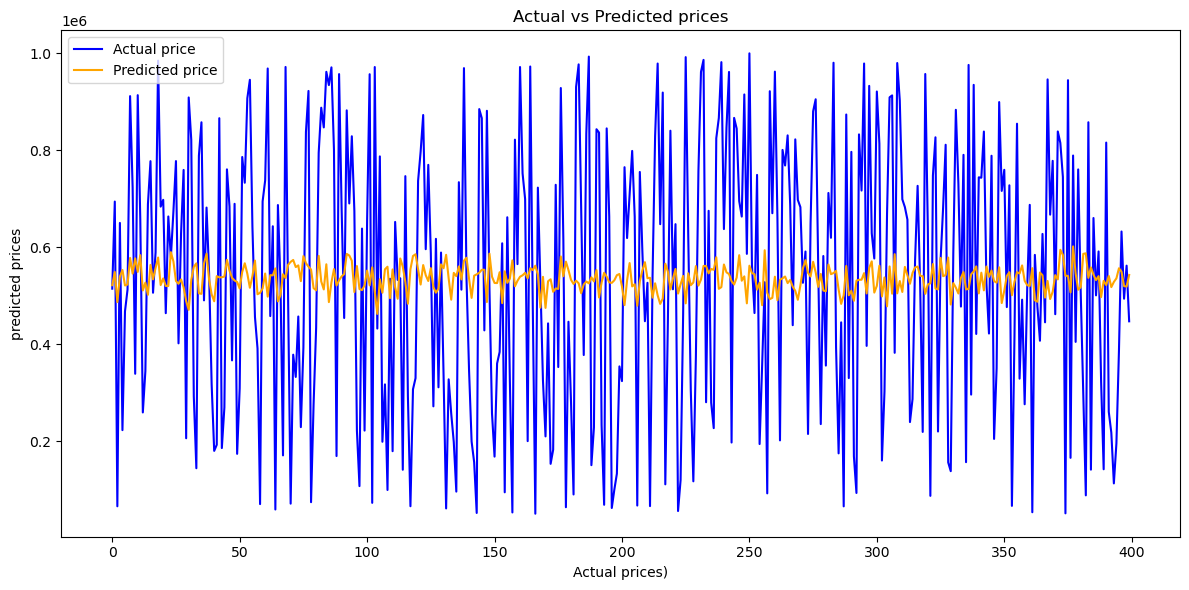

In [15]:
# Step 6: Visualize Actual vs Predicted Prices

# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
# plt.xlabel("Actual Prices")
# plt.ylabel("Predicted Prices")
# plt.title("Actual vs Predicted House Prices")
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
# plt.tight_layout()
# plt.legend()
# plt.grid(True)
# plt.show()


 # Step 7: Plot Actual vs Predicted Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual price', color='blue')
plt.plot(y_pred, label='Predicted price', color='orange')
plt.title("Actual vs Predicted prices")
plt.xlabel("Actual prices)")
plt.ylabel("predicted prices")
plt.legend()
plt.tight_layout()
plt.show()